### Question 1

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from fairlearn.datasets import fetch_acs_income
import pandas as pd

data = fetch_acs_income()

In [3]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


### Question 2

In [4]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="PINCP")

In [5]:
X.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,ST
0,18.0,1.0,18.0,5.0,4720.0,13.0,17.0,21.0,2.0,2.0,NaN
1,53.0,5.0,17.0,5.0,3605.0,18.0,16.0,40.0,1.0,1.0,NaN
2,41.0,1.0,16.0,5.0,7330.0,1.0,17.0,40.0,1.0,1.0,NaN
3,18.0,6.0,18.0,5.0,2722.0,1.0,17.0,2.0,2.0,1.0,NaN
4,21.0,5.0,19.0,5.0,3870.0,12.0,17.0,50.0,1.0,1.0,NaN


In [6]:
X.isna().sum().sort_values(ascending=False)

ST       1664500
AGEP           0
COW            0
SCHL           0
MAR            0
OCCP           0
POBP           0
RELP           0
WKHP           0
SEX            0
RAC1P          0
dtype: int64

In [7]:
X = X.drop(columns=['ST'])
X.isna().sum().sum()

np.int64(0)

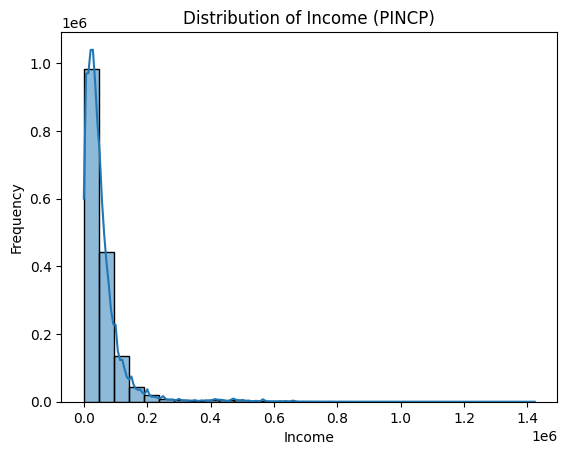

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Income (PINCP)")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

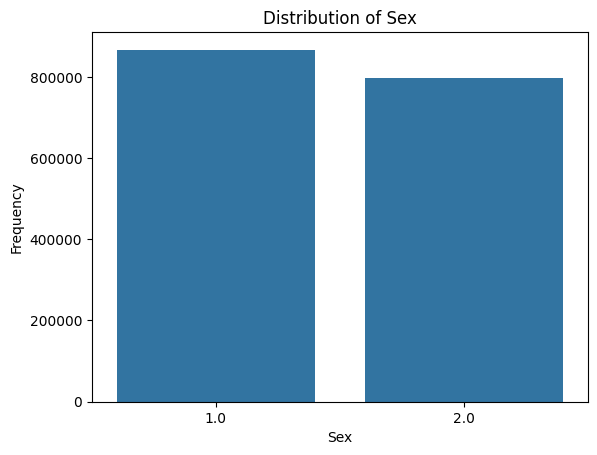

In [9]:
sns.countplot(x='SEX', data=X)
plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()

In [10]:
X.describe()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
count,1.664500e+06,1.664500e+06,1.664500e+06,1.664500e+06,1.664500e+06,1.664500e+06,1.664500e+06,1.664500e+06,1.664500e+06,1.664500e+06
mean,4.341127e+01,2.077500e+00,1.861814e+01,2.521997e+00,4.180517e+03,6.581708e+01,2.241254e+00,3.833390e+01,1.479282e+00,1.874745e+00
std,1.530203e+01,1.825338e+00,3.297826e+00,1.796720e+00,2.658717e+03,9.306245e+01,4.385288e+00,1.308073e+01,4.995707e-01,2.084384e+00
min,1.700000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+01,1.000000e+00,1.600000e+01,1.000000e+00,2.205000e+03,1.800000e+01,0.000000e+00,3.500000e+01,1.000000e+00,1.000000e+00
50%,4.300000e+01,1.000000e+00,1.900000e+01,1.000000e+00,4.200000e+03,3.600000e+01,1.000000e+00,4.000000e+01,1.000000e+00,1.000000e+00
75%,5.600000e+01,3.000000e+00,2.100000e+01,5.000000e+00,5.740000e+03,4.800000e+01,2.000000e+00,4.400000e+01,2.000000e+00,1.000000e+00
max,9.600000e+01,8.000000e+00,2.400000e+01,5.000000e+00,9.830000e+03,5.540000e+02,1.700000e+01,9.900000e+01,2.000000e+00,9.000000e+00


In [11]:
y.head(10)

0     1600.0
1    10000.0
2    24000.0
3      180.0
4    29000.0
5    24100.0
6     4500.0
7    30000.0
8     5700.0
9      970.0
Name: PINCP, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1331600, 10), (332900, 10), (1331600,), (332900,))

### Question 3

### Linear regression

In [13]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([28629.54573041, 75336.05296491, 71965.28761977, ...,
        5606.54737241, 26749.29853411, 75649.22023642], shape=(332900,))

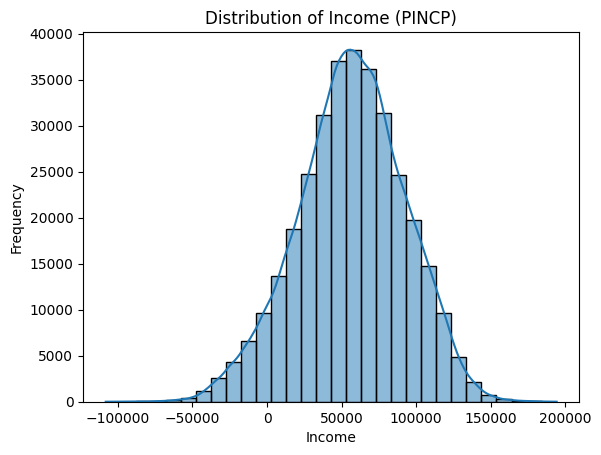

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(y_pred_lr, bins=30, kde=True)
plt.title("Distribution of Income (PINCP)")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

In [15]:
from sklearn.metrics import r2_score
lr_r2 = r2_score(y_test, y_pred_lr)
lr_r2

0.24163037446957514

In [16]:
threshold = 50000
y_pred_lr_binary = (y_pred_lr >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)


#### Logistics regression

In [17]:
from sklearn.linear_model import LogisticRegression

y_train_binary = (y_train >= threshold).astype(int)

logistic_rg_model = LogisticRegression()
logistic_rg_model.fit(X_train, y_train_binary)

# probability estimates P(Y=1 | X)
y_pred_score = logistic_rg_model.predict_proba(X_test)[:,1]
y_pred_score

array([0.14437795, 0.38623357, 0.45271569, ..., 0.30137618, 0.08061592,
       0.50346552], shape=(332900,))

In [18]:
# Class prediction at 0.5 threshold
y_pred_clf = (y_pred_score >= 0.5).astype(int)
y_pred_clf

array([0, 0, 0, ..., 0, 0, 1], shape=(332900,))

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

lr_acc = accuracy_score(y_test_binary, y_pred_clf)
f1 = f1_score(y_test_binary, y_pred_clf)

print('accuracy_score', lr_acc)
print('f1_score', f1)

accuracy_score 0.7326704716130971
f1_score 0.6512801623811726


In [20]:
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference

# definde sensitive feature
sex = 'SEX'
sex_test = X_test[sex]

dpp = demographic_parity_difference(y_true=y_test_binary, y_pred=y_pred_clf, sensitive_features=sex_test)
print(dpp)

0.07272682705537759


In [21]:
eqo = equalized_odds_difference(y_test_binary, y_pred_clf, sensitive_features=sex_test)
print(eqo)

0.03190732257452933


### Question 4

In [22]:
import numpy as np
from scipy.optimize import minimize_scalar

def solve_lambda_demographic_parity(eta, sex):
    """
    Solve for the optimal lambda in the Lagrangian formulation
    of demographic parity.

    Parameters
    ----------
    eta : array-like, shape (n_samples,)
        Estimated probabilities eta(x) = P(Y=1 | X=x)

    sex : array-like, shape (n_samples,)
        Protected attribute S in {1, 2}

    Returns
    -------
    lambda_hat : float
        Optimal Lagrange multiplier

    priors : dict
        Group priors {1: P(S=1), 2: P(S=2)}
    """

    eta = np.asarray(eta)
    sex = np.asarray(sex)

    # Masks for groups
    mask_1 = (sex == 1)
    mask_2 = (sex == 2)

    eta_1 = eta[mask_1]
    eta_2 = eta[mask_2]

    # Group priors
    p1 = np.mean(mask_1)
    p2 = np.mean(mask_2)

    priors = {1: p1, 2: p2}

    # Objective function G(lambda)
    def G(lam):
        # Group 1 contribution
        term_1 = (2 * eta_1 - 1) * p1 - lam
        loss_1 = np.mean(np.maximum(0, term_1))

        # Group 2 contribution
        term_2 = (2 * eta_2 - 1) * p2 + lam
        loss_2 = np.mean(np.maximum(0, term_2))

        return loss_1 + loss_2

    # Minimize G(lambda)
    res = minimize_scalar(G, bounds=(-2, 2), method="bounded")

    return res.x, priors


In [23]:
lambda_hat, priors = solve_lambda_demographic_parity(
    eta=y_pred_score,   # predicted probabilities
    sex=sex_test        # SEX in {1,2}
)

print(f"Optimal lambda: {lambda_hat:.4f}")
print("Group priors:", priors)


Optimal lambda: 0.0322
Group priors: {1: np.float64(0.5205256833884049), 2: np.float64(0.47947431661159506)}


In [24]:
def predict_fair_dp(eta, sex, lambda_hat, priors):
    """
    Fair classifier under demographic parity
    """
    y_pred = np.zeros_like(eta, dtype=int)

    for s in [1, 2]:
        mask = (sex == s)
        ps = priors[s]

        if s == 1:
            decision = (2 * eta[mask] - 1) * ps >= lambda_hat
        else:
            decision = (2 * eta[mask] - 1) * ps >= -lambda_hat

        y_pred[mask] = decision.astype(int)

    return y_pred

y_pred_fair = predict_fair_dp(
    eta=y_pred_score,
    sex=sex_test,
    lambda_hat=lambda_hat,
    priors=priors
)


In [25]:
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference

acc_fair = accuracy_score(y_test_binary, y_pred_fair)
f1_fair = f1_score(y_test_binary, y_pred_fair)

print('accuracy_score fair', acc_fair)
print('f1_score fair', f1_fair)

dpp_fair = demographic_parity_difference(y_true=y_test_binary, y_pred=y_pred_fair, sensitive_features=sex_test)
eqo_fair = equalized_odds_difference(y_test_binary, y_pred_fair, sensitive_features=sex_test)

print('dpp fair:', dpp_fair)
print('eqo fair:', eqo_fair)

accuracy_score fair 0.7248062481225593
f1_score fair 0.6442611619797612
dpp fair: 2.5466655537154104e-06
eqo fair: 0.07856418139344415


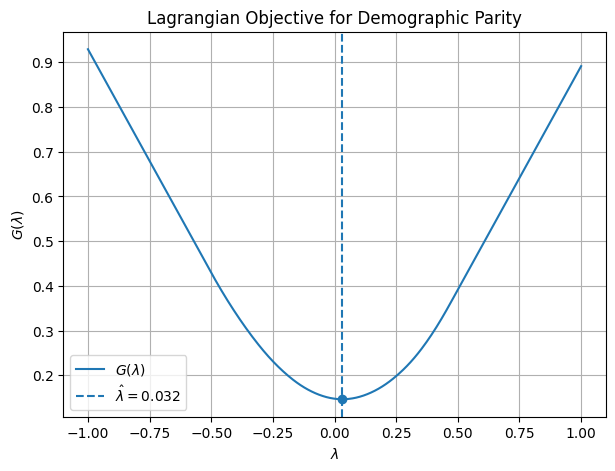

In [26]:
def build_G_function(eta, sex):
    eta = np.asarray(eta)
    sex = np.asarray(sex)

    mask_1 = (sex == 1)
    mask_2 = (sex == 2)

    eta_1 = eta[mask_1]
    eta_2 = eta[mask_2]

    p1 = np.mean(mask_1)
    p2 = np.mean(mask_2)

    def G(lam):
        term_1 = (2 * eta_1 - 1) * p1 - lam
        loss_1 = np.mean(np.maximum(0, term_1))

        term_2 = (2 * eta_2 - 1) * p2 + lam
        loss_2 = np.mean(np.maximum(0, term_2))

        return loss_1 + loss_2

    return G

# Build G(λ)
G = build_G_function(y_pred_score, sex_test)

# Grid of lambda values
lambda_grid = np.linspace(-1, 1, 400)

# Evaluate G on the grid
G_values = np.array([G(lam) for lam in lambda_grid])

# Find optimal lambda on the same interval
res = minimize_scalar(G, bounds=(-1, 1), method="bounded")
lambda_hat = res.x
G_hat = G(lambda_hat)

plt.figure(figsize=(7, 5))
plt.plot(lambda_grid, G_values, label=r"$G(\lambda)$")
plt.axvline(lambda_hat, linestyle="--", label=rf"$\hat{{\lambda}} = {lambda_hat:.3f}$")
plt.scatter(lambda_hat, G_hat, zorder=3)

plt.xlabel(r"$\lambda$")
plt.ylabel(r"$G(\lambda)$")
plt.title("Lagrangian Objective for Demographic Parity")
plt.legend()
plt.grid(True)
plt.show()

### Question 5

In [27]:
print('THIS IS STANDARD MODEL')
print('accuracy_score', lr_acc)
print('f1_score', f1)
print('dpp standart:', dpp)
print('eqo standart:', eqo)

THIS IS STANDARD MODEL
accuracy_score 0.7326704716130971
f1_score 0.6512801623811726
dpp standart: 0.07272682705537759
eqo standart: 0.03190732257452933


In [28]:
print('THIS IS FAIR MODEL')
print('accuracy_score fair', acc_fair)
print('f1_score fair', f1_fair)
print('DDP fair:', dpp_fair)
print('eqo fair:', eqo_fair)

THIS IS FAIR MODEL
accuracy_score fair 0.7248062481225593
f1_score fair 0.6442611619797612
DDP fair: 2.5466655537154104e-06
eqo fair: 0.07856418139344415


AS expected, DDP of FAIR MODEL IS approximate to 0 but this accuracy is lower that the standad model 

### Question 6

In [29]:
from fairlearn.postprocessing import ThresholdOptimizer
from sklearn.linear_model import LogisticRegression

In [30]:
threshold = 50000
y_train_binary = (y_train >= threshold).astype(int)
y_test_binary = (y_test >= threshold).astype(int)

In [31]:

# Question 6: ThresholdOptimizer (All-in-One Cell)

# 1. Train standard classifier
clf = LogisticRegression()
clf.fit(X_train, y_train_binary)


# 2. Extract sensitive feature (SEX ∈ {1,2})
sex_train = X_train['SEX']
sex_test  = X_test['SEX']


# 3. Define ThresholdOptimizer
#    (IMPORTANT: objective must be "accuracy_score")

threshold_opt = ThresholdOptimizer(
    estimator=clf,
    constraints="demographic_parity",
    objective="accuracy_score",
    predict_method="predict_proba"
)


# 4. Fit ThresholdOptimizer
threshold_opt.fit(
    X_train,
    y_train_binary,
    sensitive_features=sex_train
)


# 5. Predict with fair classifier
y_pred_thresh = threshold_opt.predict(
    X_test,
    sensitive_features=sex_test
)


# 6. Evaluate ThresholdOptimizer
acc_thresh = accuracy_score(y_test_binary, y_pred_thresh)
f1_thresh  = f1_score(y_test_binary, y_pred_thresh)

dp_thresh = demographic_parity_difference(
    y_test_binary,
    y_pred_thresh,
    sensitive_features=sex_test
)

eo_thresh = equalized_odds_difference(
    y_test_binary,
    y_pred_thresh,
    sensitive_features=sex_test
)

print("=== ThresholdOptimizer (Demographic Parity) ===")
print(f"Accuracy: {acc_thresh:.4f}")
print(f"F1-score: {f1_thresh:.4f}")
print(f"Demographic Parity Difference: {dp_thresh:.6f}")
print(f"Equalized Odds Difference: {eo_thresh:.6f}")


=== ThresholdOptimizer (Demographic Parity) ===
Accuracy: 0.7275
F1-score: 0.6246
Demographic Parity Difference: 0.002658
Equalized Odds Difference: 0.069071


### FINAL COMAPARISON

In [32]:
print('THIS IS STANDARD MODEL')
print('accuracy_score', lr_acc)
print('f1_score', f1)
print('dpp standart:', dpp)
print('eqo standart:', eqo)

THIS IS STANDARD MODEL
accuracy_score 0.7326704716130971
f1_score 0.6512801623811726
dpp standart: 0.07272682705537759
eqo standart: 0.03190732257452933


In [33]:
print('THIS IS FAIR MODEL')
print('accuracy_score fair', acc_fair)
print('f1_score fair', f1_fair)
print('DDP fair:', dpp_fair)
print('eqo fair:', eqo_fair)

THIS IS FAIR MODEL
accuracy_score fair 0.7248062481225593
f1_score fair 0.6442611619797612
DDP fair: 2.5466655537154104e-06
eqo fair: 0.07856418139344415


In [34]:
print("=== ThresholdOptimizer (Demographic Parity) ===")
print(f"Accuracy: {acc_thresh:.4f}")
print(f"F1-score: {f1_thresh:.4f}")
print(f"Demographic Parity Difference: {dp_thresh:.6f}")
print(f"Equalized Odds Difference: {eo_thresh:.6f}")

=== ThresholdOptimizer (Demographic Parity) ===
Accuracy: 0.7275
F1-score: 0.6246
Demographic Parity Difference: 0.002658
Equalized Odds Difference: 0.069071
